In [1]:
import tifffile as tf
import numpy as np
import os
import argparse
import glob
import math
import importlib
import time
import itertools
import pandas as pd
from matplotlib import pyplot as plt
import scipy.ndimage as ndimage
import scipy.special as special
from matplotlib import cm

In [2]:
import brewing_utils as brew

## Fixed number of parallels and meridians

In [12]:
parallels = 5
meridians = 8
pdirections = brew.pole_directions(parallels,meridians,x=1,y=0,z=2)

In [13]:
importlib.reload(brew)

dst = '../data/directions/'
title = '{} Parallels\n{} Meridians:\n\n{} directions'.format(parallels*2-1, meridians, len(pdirections))
filename = 'pole_directions_p{}_m{}'.format(parallels,meridians)

brew.plot_pole_directions(pdirections, title, parallels, meridians, 
                          True,dst=dst,filename=filename)

## Random Placement

In [52]:
def random_directions(N=50, r=1):
    rng = np.random.default_rng()
    z = rng.uniform(-r, r, N)
    phi = rng.uniform(0, 2*np.pi, N)
    x = np.sqrt(r**2 - z**2)*np.cos(phi)
    y = np.sqrt(r**2 - z**2)*np.sin(phi)
    
    return np.column_stack((x,y,z))

In [53]:
rdirections = random_directions(len(pdirections))

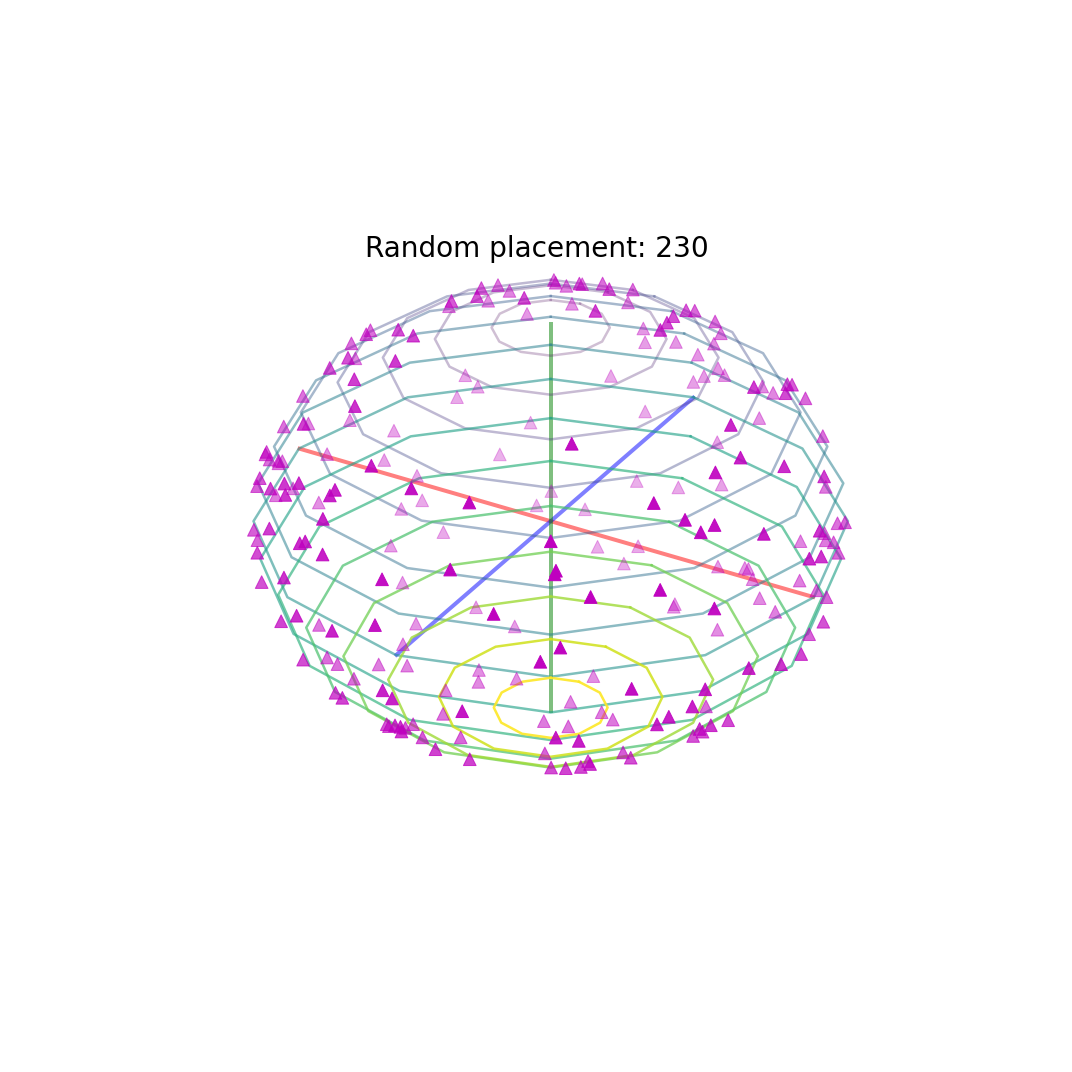

In [55]:
title = 'Random placement: {}'.format(len(rdirections))
filename = 'random_directions_{}'.format(len(rdirections))
brew.plot_pole_directions(rdirections, titleplot = title, dst=dst,filename=filename)

## Regular placement

In [56]:
def regular_directions(N=50, r=1):
    dirs = np.zeros((N, 3), dtype=np.float64)
    i = 0
    a = 4*np.pi*r**2/N
    d = np.sqrt(a)
    Mtheta = np.round(np.pi/d)
    dtheta = np.pi/Mtheta
    dphi = a/dtheta
    for m in range(int(Mtheta)):
        theta = np.pi*(m + 0.5)/Mtheta
        Mphi = np.round(2*np.pi*np.sin(theta)/dphi)
        for n in range(int(Mphi)):
            phi = 2*np.pi*n/Mphi
            
            dirs[i,:] = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)
            i += 1
    
    return dirs

In [64]:
udirections = brew.regular_directions(250)

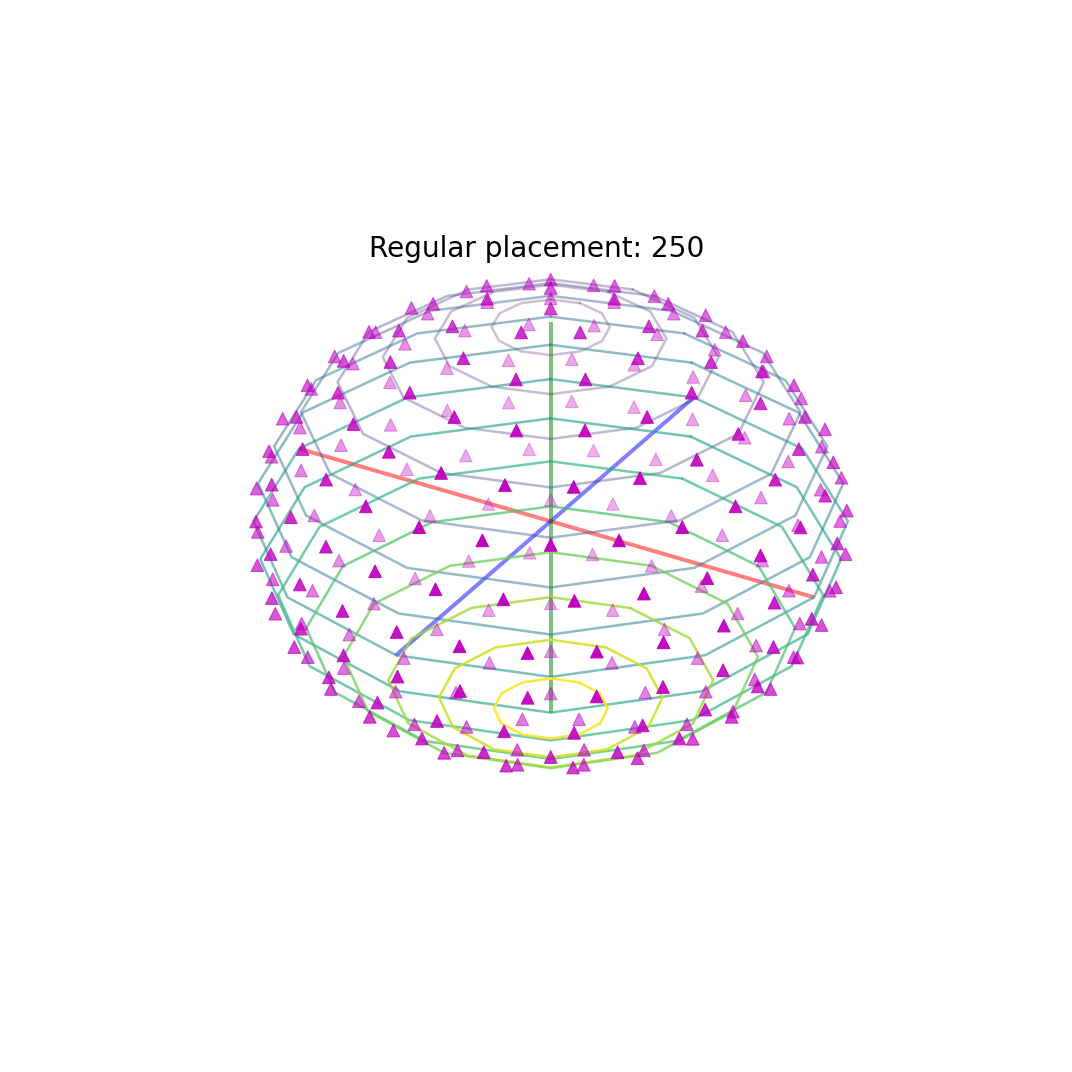

In [65]:
title = 'Regular placement: {}'.format(len(udirections))
filename = 'uniform_directions_{}'.format(len(udirections))
brew.plot_pole_directions(udirections, titleplot = title, dst=dst,filename=filename)

In [66]:
np.sum(udirections**2,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.